In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\abhishek\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import tensorflow as tf
model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
import os
path = "Images"
images = []
labels = []

for j in os.listdir(path):
    img = tf.keras.preprocessing.image.load_img(os.path.join(path, j), target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    images.append(img_array)
    labels.append(j.split(".")[0])

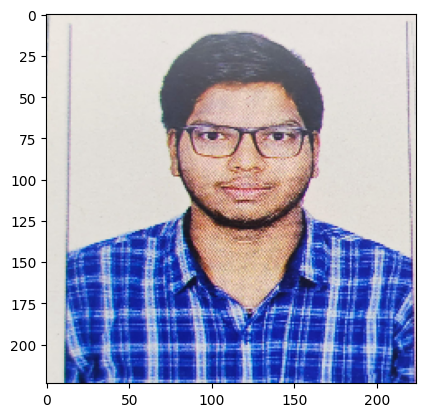

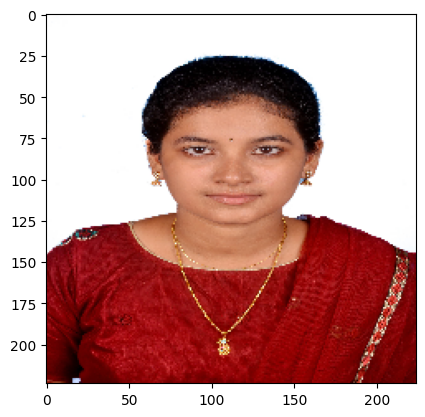

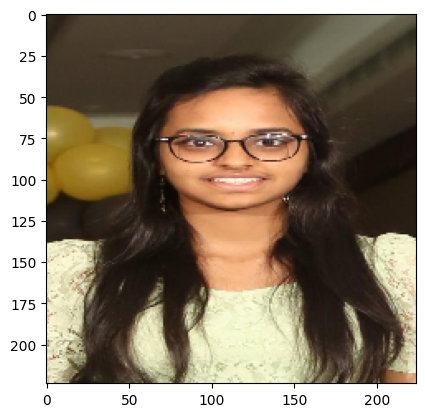

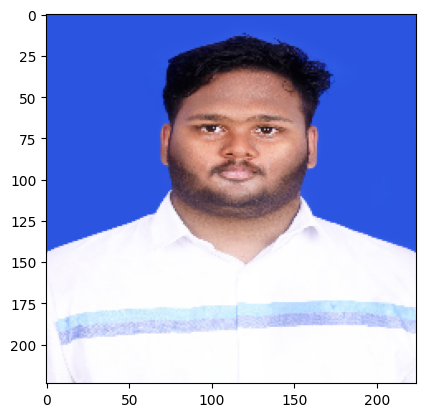

In [4]:
# read and view the images
import matplotlib.pyplot as plt 
import numpy as np
for i in range(4):
    plt.imshow(np.array(images[i][0], dtype='uint8'))
    plt.show()

In [5]:
images[0].shape

TensorShape([1, 224, 224, 3])

In [6]:
labels

['Bharath', 'Jahnavi', 'Sathwika', 'Sravan']

In [7]:

output_lables = [[0],[1],[2],[3]]

In [8]:
len(images)

4

In [9]:
df = tf.data.Dataset.from_tensor_slices((images, output_lables))

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = df.prefetch(buffer_size=AUTOTUNE)
test_dataset = df.prefetch(buffer_size=AUTOTUNE)

In [11]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = model(image_batch)
print(feature_batch.shape)

(1, 7, 7, 960)


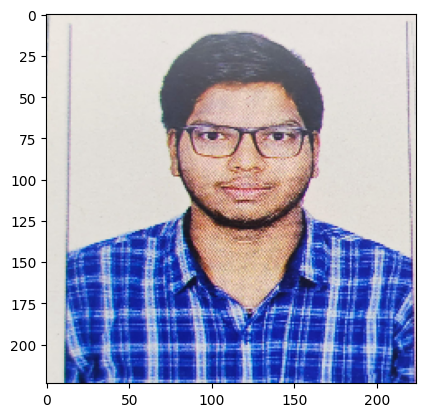

In [12]:
# view the image batch
plt.imshow(np.array(image_batch[0], dtype='uint8'))

In [13]:
label_batch

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>

In [14]:
image_batch.shape

TensorShape([1, 224, 224, 3])

In [15]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(1, 960)


In [16]:
prediction_layer = tf.keras.layers.Dense(4, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(1, 4)


In [17]:
model.trainable = True
x = model
x = global_average_layer(model.output)
x = tf.keras.layers.Dropout(0.2)(x)
x = prediction_layer(x)
model = tf.keras.Model(model.input, x)

In [18]:
len(model.trainable_variables)

172

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [20]:
base_learning_rate = 0.0001

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Correct name
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]  # Correct metric
)

In [21]:
epochs = 300
history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=test_dataset)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.0000e+00 - loss: 1.9815 - val_accuracy: 0.5000 - val_loss: 1.5301
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.5333 - loss: 1.2411 - val_accuracy: 0.5000 - val_loss: 1.4893
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 1.0000 - loss: 0.5656 - val_accuracy: 0.5000 - val_loss: 1.4517
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 1.0000 - loss: 0.3200 - val_accuracy: 0.5000 - val_loss: 1.4239
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.2175 - val_accuracy: 0.5000 - val_loss: 1.4010
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 1.0000 - loss: 0.1301 - val_accuracy: 0.5000 - val_loss: 1.3843
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0680 - val_accuracy: 0.5000 - val_loss: 1.3734
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 0.0791 - val_accuracy: 0.5000 -

In [22]:
model.save("face-net-savedmodel.keras")

In [38]:
new_model = tf.keras.models.load_model("face-net-savedmodel.keras")

In [39]:
def predict_class(img_array, model, labels, confidence_threshold=0.4):
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    prediction_confidence = np.max(prediction)
    print(prediction_confidence)
    # If confidence is below threshold, return "Unknown"
    if prediction_confidence < confidence_threshold:
        return "Unknown"
    
    return labels[predicted_class]

In [46]:
img = tf.keras.preprocessing.image.load_img(r"Images\Sravan.jpg", target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [47]:
new = predict_class(img_array, new_model, labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
0.486005


In [48]:
new

'Jahnavi'

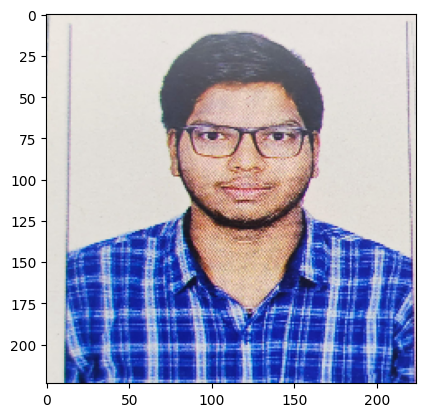

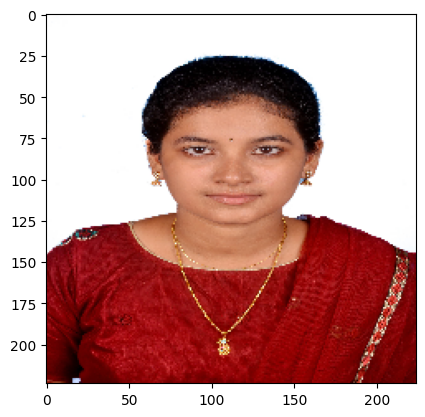

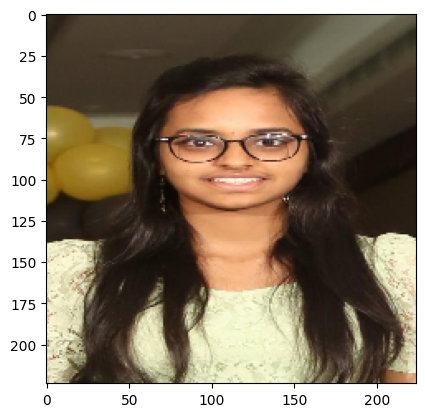

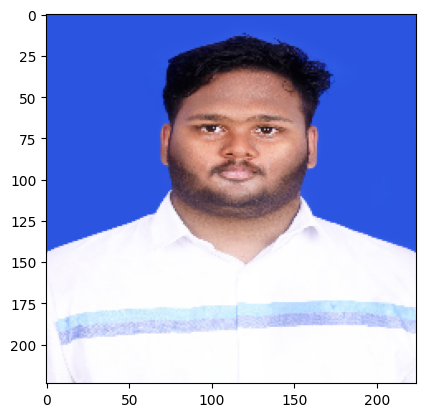

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - accuracy: 0.2500 - loss: 1.6430 - val_accuracy: 0.2500 - val_loss: 1.5469
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.2500 - loss: 1.6637 - val_accuracy: 0.2500 - val_loss: 1.5472
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5000 - loss: 0.9397 - val_accuracy: 0.2500 - val_loss: 1.5473
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.5000 - loss: 1.5388 - val_accuracy: 0.2500 - val_loss: 1.5478
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.7500 - loss: 0.7495 - val_accuracy: 0.2500 - val_loss: 1.5486
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.2500 - loss: 0.9795 - val_accuracy: 0.2500 - val_loss: 1.5492
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.7500 - loss: 0.6644 - val_accuracy: 0.2500 - val_loss: 1.5494
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 1.0000 - loss: 0.3578 - val_accuracy: 0.2500 - va

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

# Load MobileNetV3 model
model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Load images and labels
path = "Images"
images = []
labels = []

for j in os.listdir(path):
    img = tf.keras.preprocessing.image.load_img(os.path.join(path, j), target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    images.append(img_array)
    labels.append(j.split(".")[0])

# Visualize the first 4 images
for i in range(4):
    plt.imshow(np.array(images[i][0], dtype='uint8'))
    plt.show()

output_labels = [[0], [1], [2], [3]]

# Create TensorFlow dataset
df = tf.data.Dataset.from_tensor_slices((images, output_labels))
AUTOTUNE = tf.data.AUTOTUNE

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

# Preprocess images
def preprocess_image(img, label):
    img = tf.cast(img[0], tf.float32) / 255.0  # Normalize image
    img = data_augmentation(img)  # Apply data augmentation
    return img, label

# Apply preprocessing and prepare datasets
train_dataset = (
    df
    .map(preprocess_image, num_parallel_calls=AUTOTUNE)
    .shuffle(buffer_size=100)
    .batch(32)
    .prefetch(buffer_size=AUTOTUNE)
)

test_dataset = (
    df
    .map(lambda x, y: (tf.cast(x[0], tf.float32) / 255.0, y))
    .batch(32)
    .prefetch(buffer_size=AUTOTUNE)
)

# Train the model
image_batch, label_batch = next(iter(train_dataset))
feature_batch = model(image_batch)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

prediction_layer = tf.keras.layers.Dense(4, activation='softmax')
model.trainable = True
x = global_average_layer(model.output)
x = tf.keras.layers.Dropout(0.2)(x)
x = prediction_layer(x)
model = tf.keras.Model(model.input, x)

base_learning_rate = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
)

epochs = 300
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset
)

# Save and reload model
model.save("face-net-savedmodel.keras")
new_model = tf.keras.models.load_model("face-net-savedmodel.keras")

# Prediction function
def predict_class(img_array, model, labels, confidence_threshold=0.4):
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    prediction_confidence = np.max(prediction)
    print(prediction_confidence)
    if prediction_confidence < confidence_threshold:
        return "Unknown"
    return labels[predicted_class]

# Test prediction
img = tf.keras.preprocessing.image.load_img(r"Images\Sathwika.jpg", target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
new = predict_class(img_array, new_model, labels)
print(new)

# Display TensorFlow version
print(tf.version.VERSION)
